# Weighted Average Temperature

In this Notebook, we create an algorithm that can be used to automatically tell the weigthed average temperature of the object refpresented in the thermal image. We ultimately use an OCR (Object Character Recognition) tool to change numerical text on the image to a string that can be used for processing purposes. 

In [1391]:
from skimage import io
from matplotlib import pyplot as plt

#Importing the image from  the Desktop
image=io.imread("C:/Users/user/Desktop/James_out.jpg")

#Cropping the image into 3 parts
cropped = image[0:580,200:1200]
cropped1 = image[640:680,0:30]
cropped2 = image[645:680,1248:1280]

# Convert colour image to viridis (default greyscale)
from skimage.color import rgb2gray 
virid = rgb2gray(cropped)

array([254, 254, 254], dtype=uint8)

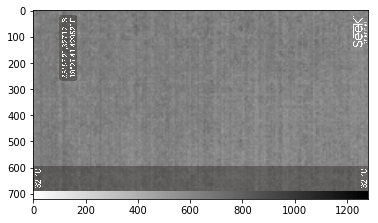

In [1392]:
# Displaying the image
plt.imshow(image)
image[700,1]

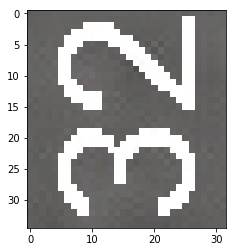

In [1393]:
plt.imshow(cropped2)

In [1394]:

try:   
    from PIL import Image
except ImportError:
    import Image
import pytesseract

from scipy import ndimage as ndi
import numpy as np
import cv2
from PIL import Image
import pytesseract
from skimage.color import rgb2gray # Convert colour image to viridis (default greyscale)
from skimage.filters import threshold_otsu, threshold_local
from skimage import data
from matplotlib import pyplot as plt

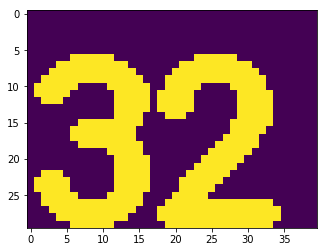

In [1395]:
#Correctly orientating the image for the text identifier
img = rgb2gray(cropped1)
image = np.rot90(img,k=3)

# segmenting the image using Otsy's method
from skimage.filters import threshold_otsu, threshold_local
block_size = 67
local_thresh = threshold_local(image, block_size, offset=0.002)
image1 = image > local_thresh

#Applying Binary Dilation
a = scipy.ndimage.morphology.binary_dilation(image1, iterations=1)
plt.imshow(a)

In [1396]:
#Applying Binary Erosion
b = scipy.ndimage.morphology.binary_erosion(a)

#Converting the 0:1 range to 0:255
from PIL import Image
import scipy.misc
im = Image.fromarray(b)
im = Image.fromarray(b * 255)

-256


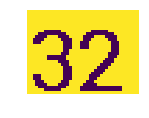

In [1397]:
#Inverting the colouring for text identifier
x = np.invert(im)
figure = plt.gcf()

#Setting figure size for display
figure.set_size_inches(2, 3)
plt.axis('off')
plt.imshow(x)
print(x[8,4])

In [1398]:
print(result)
import matplotlib.image as mpimg

#Saving the figure 
figure.savefig("out1.png",dpi = 400)

In [1399]:
#Applying the text identifier and converting the received string to an int
y_2 = int(pytesseract.image_to_string(Image.open("out1.png")))
print(y_2)

32


The same process is now applied ofr the second number found on the bottom right of this image

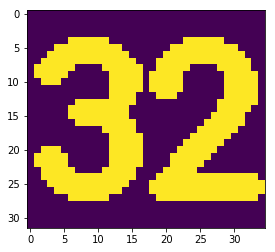

In [1400]:
img = rgb2gray(cropped2)
image = np.rot90(img,k=3)


from skimage.filters import threshold_otsu, threshold_local
block_size = 97
local_thresh = threshold_local(image, block_size, offset=0.02)
image1 = image > local_thresh
#fill = ndi.binary_fill_holes(image1)
a = scipy.ndimage.morphology.binary_dilation(image1, iterations=1)
plt.imshow(a)

-256


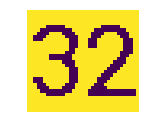

In [1401]:
b = scipy.ndimage.morphology.binary_erosion(a, iterations = 1)
from PIL import Image
import scipy.misc
im = Image.fromarray(b)
im = Image.fromarray(b * 255)
x = np.invert(im)
figure = plt.gcf()
figure.set_size_inches(2, 3)
plt.axis('off')
plt.imshow(x)
print(x[8,4])

In [1402]:
print(result)
import matplotlib.image as mpimg

figure.savefig("out2.png",dpi = 400)

In [1403]:
y_1 = int(pytesseract.image_to_string(Image.open("out2.png")))
print(y_1)

32


In [1416]:
# Finding the gradient
m = (y_2 - y_1)/(image.max() - image.min()) 

#Finding the average intensity
avg = np.cumsum(image)
avg_1 = avg[len(avg)-1]
x = avg_1 / image.size


#Printing the resulting gradient
print(x)

#Printing the resulting gradient
print(m)

0.51612292507003
0.0


In [1417]:
# Displaying the Final temperature
t = m*x + y_1
print(t)

32.0
